## Решение задач линейной алгебры

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### 1. Предположим, мы взвешиваем одинаковые груши (х) и яблоки (y). Оцените их вес, если мы делаем три взвешивания:
х+2у=500 
3х+у=750
2х+2у=700

In [265]:
A1  = np.array([[1,2],[3,1],[2,2]])
B1  = np.array([[1,2,500],[3,1,750],[2,2,700]])
print(f'ранг основной матрицы {np.linalg.matrix_rank(A1)}')
print(f'ранг расширенной матрицы {np.linalg.matrix_rank(B1)}')
print('Система совместна и имеет 1 решение')

ранг основной матрицы 2
ранг расширенной матрицы 2
Система совместна и имеет 1 решение


In [36]:
# Данная матрица решается с помощью метода Гаусса
A = np.array([[1, 2, 500], [3, 1, 750], [2, 2, 700]], float)
A[1] = A[1]+A[0]*(-3)
A[2] = (A[2] + A[0]*(-2))/2
tmp = np.array(A[1])
A[1] = A[2]
A[2] = tmp + A[1]*(-5)
A

array([[   1.,    2.,  500.],
       [   0.,   -1., -150.],
       [   0.,    0.,    0.]])

x = 200, y = 150

т.к. третье уравнение системы не участвует в образовании базисного минора, его можно исключить из системы на основании теоремы о ранге матрицы

In [311]:
M1 = np.array([[1.0, 2.0], [3.0, 1.0]]) # Матрица (левая часть системы)
# M12 = np.array([[1.0, 2.0], [2.0, 2.0]])
v1 = np.array([500.0, 750.0]) # Вектор (правая часть системы)
# v12 = np.array([500.0, 700.0])
np.linalg.solve(M1, v1)

array([200., 150.])

##### 2. Как изменится ответ, если результат последнего взвешивания будет не 700, а 650 (г)?
х+2у=500 
3х+у=750
2х+2у=650

In [193]:
A2 = np.array([[1,2],[3,1],[2,2]])
B2 = np.array([[1,2,500],[3,1,750],[2,2,650]])
v2 = np.array([500, 750, 650])

In [194]:
# Решение через линейную редукцию
R2 = np.dot(np.linalg.inv(np.dot(A2.T, A2)),A2.T)
np.dot(R2, v2)

array([200.        , 138.88888889])

ранг основной матрицы 2
ранг расширенной матрицы 3
Система линейных уравнений несовместна


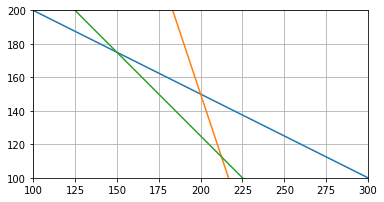

In [304]:
A2 = np.array([[1,2],[3,1],[2,2]])
B2 = np.array([[1,2,500],[3,1,750],[2,2,650]])
v2 = np.array([500, 750, 650])

print(f'ранг основной матрицы {np.linalg.matrix_rank(A2)}')
print(f'ранг расширенной матрицы {np.linalg.matrix_rank(B2)}')
print('Система линейных уравнений несовместна')

M1 = np.array([[3.0, 1.0], [2.0, 2.0]]) # Матрица (левая часть системы)
v1 = np.array([750.0, 650.0]) # Вектор (правая часть системы)
np.linalg.solve(M1, v1)

x = np.linspace(-500,500,10)
y1 = (500-x)/2
y2 = 750-3*x
y3 = (650-2*x)/2

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.axes().set_aspect(1)
plt.grid(True)
plt.xlim(100,300)
plt.ylim(100,200)
plt.show()

##### 3. Поменяем третье взвешивание еще раз:
х+2у=500 
3х+у=750
2х+3у=700

In [266]:
A3  = np.array([[1,2],[3,1],[2,3]])
v3 = np.array([500, 750, 700])

# Решение через линейную редукцию
R3 = np.dot(np.linalg.inv(np.dot(A3.T, A3)),A3.T)
np.dot(R3, v3)

array([210., 110.])

ранг основной матрицы 2
ранг расширенной матрицы 3
Система линейных уравнений несовместна


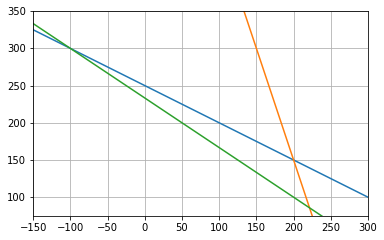

[200. 150.]
[-100.  300.]
[221.42857143  85.71428571]


In [305]:
A3  = np.array([[1,2],[3,1],[2,3]])
B3  = np.array([[1,2,500],[3,1,750],[2,3,700]])

print(f'ранг основной матрицы {np.linalg.matrix_rank(A3)}')
print(f'ранг расширенной матрицы {np.linalg.matrix_rank(B3)}')
print('Система линейных уравнений несовместна')

x = np.linspace(-500,500,10)
y1 = (500-x)/2
y2 = 750-3*x
y3 = (700-2*x)/3

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.axes().set_aspect(1)
plt.grid(True)
plt.xlim(-150,300)
plt.ylim(75,350)
plt.show()


M1 = np.array([[1.0, 2.0], [3.0, 1.0]])
v1 = np.array([500.0, 750.0])
M2 = np.array([[1.0, 2.0], [2.0, 3.0]])
v2 = np.array([500.0, 700.0])
M3 = np.array([[3.0, 1.0], [2.0, 3.0]])
v3 = np.array([750.0, 700.0]) 
print(np.linalg.solve(M1, v1))
print(np.linalg.solve(M2, v2))
print(np.linalg.solve(M3, v3))

##### 4. Как изменится решение, если добавить 4-е взвешивание?
х+2у=500 
3х+у=750
2х+3у=700
х+5у=850

In [198]:
A4  = np.array([[1,2],[3,1],[2,3],[1,5]])
v4 = np.array([500, 750, 700, 850])

# Решение через линейную редукцию
R4 = np.dot(np.linalg.inv(np.dot(A4.T, A4)),A4.T)
np.dot(R4, v4)

array([198.78419453, 126.13981763])

ранг основной матрицы 2
ранг расширенной матрицы 3
Система линейных уравнений несовместна


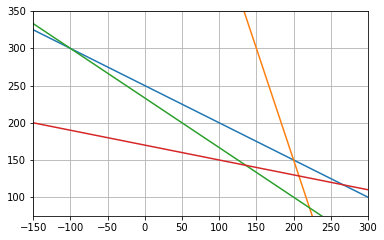

[200. 150.]
[-100.  300.]
[266.66666667 116.66666667]
[221.42857143  85.71428571]
[207.14285714 128.57142857]
[135.71428571 142.85714286]


In [306]:
A4  = np.array([[1,2],[3,1],[2,3],[1,5]])
B4  = np.array([[1,2,500],[3,1,750],[2,3,700],[1,5,850]])
print(f'ранг основной матрицы {np.linalg.matrix_rank(A4)}')
print(f'ранг расширенной матрицы {np.linalg.matrix_rank(B4)}')
print('Система линейных уравнений несовместна')

x = np.linspace(-500,500,10)
y1 = (500-x)/2
y2 = 750-3*x
y3 = (700-2*x)/3
y4 = (850-x)/5

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.axes().set_aspect(1)
plt.grid(True)
plt.xlim(-150,300)
plt.ylim(75,350)
plt.show()

M1 = np.array([[1.0, 2.0], [3.0, 1.0]])
v1 = np.array([500.0, 750.0])
M2 = np.array([[1.0, 2.0], [2.0, 3.0]])
v2 = np.array([500.0, 700.0])
M3 = np.array([[1.0, 2.0], [1.0, 5.0]])
v3 = np.array([500.0, 850.0])
M4 = np.array([[3.0, 1.0], [2.0, 3.0]])
v4 = np.array([750.0, 700.0]) 
M5 = np.array([[3.0, 1.0], [1.0, 5.0]])
v5 = np.array([750.0, 850.0]) 
M6 = np.array([[2.0, 3.0], [1.0, 5.0]])
v6 = np.array([700.0, 850.0]) 
print(np.linalg.solve(M1, v1))
print(np.linalg.solve(M2, v2))
print(np.linalg.solve(M3, v3))
print(np.linalg.solve(M4, v4))
print(np.linalg.solve(M5, v5))
print(np.linalg.solve(M6, v6))

##### 5. Предположим, мы взвешиваем  груши (х),  яблоки (y) и сливы (z). При этом, у нас есть дополнительная априорная информация о предполагаемом весе фруктов: предварительная оценка веса груши ~150, яблока у~100,  а сливы z~50?.  Оцените вес яблок, груш и слив:
х+2у+5z=550
3х+у+3z=800

In [313]:
A5 = np.array([[1,2,5],[3,1,3]])
x5 = np.array([150, 100, 50])
v5 = np.array([550,800])
X_a = np.dot(A5,x5)
b5 = v5 - X_a

In [315]:
Q = np.linalg.lstsq(A5, b5)
x5+Q[0]

array([203.23529412,  88.82352941,  33.82352941])

##### 6. Решите систему:
х+2у=10 
1.05х+2.1у=12

In [2]:
M6 = np.array([[1.0, 2.0], [1.05, 2.1]]) # Матрица (левая часть системы)
v6 = np.array([10.0, 12.0]) # Вектор (правая часть системы)
np.linalg.solve(M6, v6)

array([ 1.08086391e+17, -5.40431955e+16])

In [4]:
Q6 =  np.linalg.lstsq(M6, v6)
Q6[0]

array([2.14982164, 4.29964328])